# Piecewise

Run the source code:

In [72]:
%run "code\piecewise.py"

## Example 3.1

Modify `a`, `m`, and `c` to provide the intervals, gradients, and intercept respectively, for a model in one dimension. Ensure that `a` has one fewer entries than `m`. A plot will be produced showing the graph of $f\left(x\right)$ as a line.

The `plot_oned_model()` function has two additional parameters, `xlim` and `pt`, which control the limits for the x values and the number of points that the function is evaluated at, with default values of `(-10,10)` and `1000` respectively. You may wish to modify these depending on your choice of `a`.

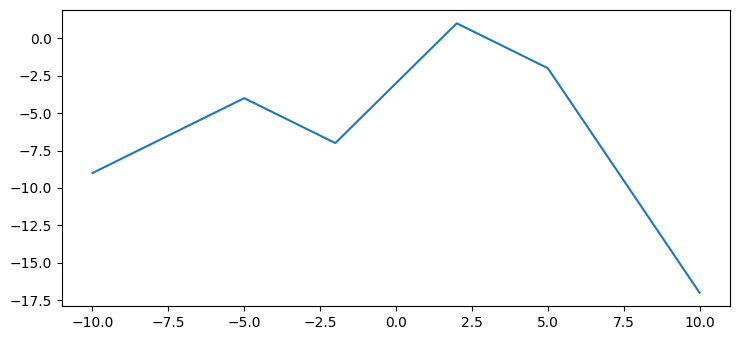

In [73]:
# Specify a in R^r, m in R^R+1, and c in R
a = [-5,-2,2,5]
m = [1,-1,2,-1,-3]
c = 1

M = make_oned_model(a=np.array(a), m=np.array(m), c=c)
plot_oned_model(M=M)


## Example 3.2

Modify `a`, `m`, and `c` to provide the boxes, gradients, and intercept respectively, for a model in two dimensions. Ensure that each list in `a` has one fewer entries than the corresponding list in `m`. A plot will be produced showing the graph of $f\left(x_1, x_2\right)$ as a surface.

The `plot_twod_model()` function has three additional parameters, `x1lim`, `x2lim`, and `pt`.

`x1lim` and `x2lim` control the limits for the x1 and x2 values, with defaults of `(-10,10)` for each. `pt` controls the number of points the function is evaluated at for each axis, with a default value of `100`. You may wish to modify these depending on your choice of `a`.

C:\Users\m0ode\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


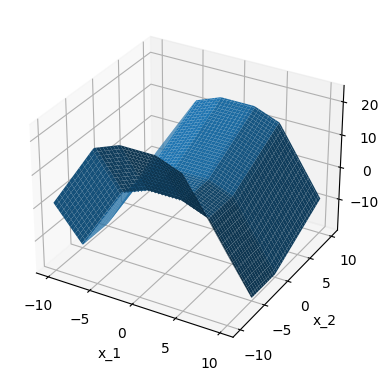

In [74]:
# Specify an integer between 2 and 8 for practical run time
a = [[-5,-2,2,5],[-5,0,-5]]
m = [[4,1,0,-1,-4],[-4,-1,0,1]]
c = 1


M = make_nd_model(a=[np.array(a_i) for a_i in a], m=[np.array(m_i) for m_i in m], c=c)
plot_twod_model(M)

## Example 3.3

This example creates an exact model in one dimension as in example 3.1. We also create another model which is trained using the exact model to see how closely it can replicate the output.

The initial model uses the same input parameters as in example 3.1. For the training, we set `r` to be the learning rate, `samples` to be the number of training samples we generate using the exact model, and `epochs` is the number of epochs for training.

The trained model is usually able to match the exact model on at least one interval, and loosely approximate the shape on the rest. Also, since the trained model uses the same architecture as the exact model, we can see that the trained model also produces a piecewise linear function.

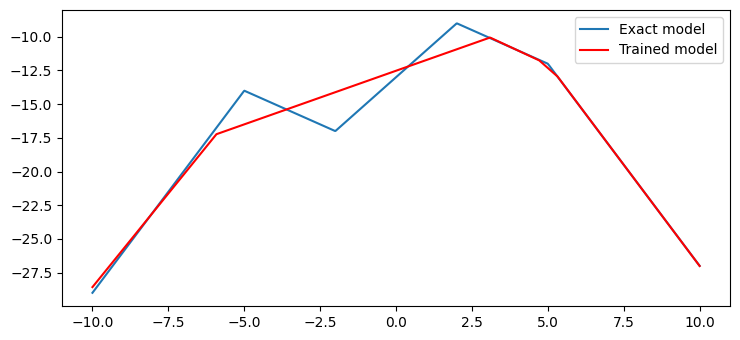

In [78]:
# Specify a in R^r, m in R^R+1, and c in R
a = [-5,-2,2,5]
m = [3,-1,2,-1,-3]
c = 1

# Specify r small (~0.01), samples and epochs large (100+)
r = 0.01
samples=1000
epochs=10000

# Optionally set seed (comment/uncomment line below)
tf.random.set_seed(210138711)

N = make_oned_model(a=np.array(a), m=np.array(m), c=c)
M = make_approx_model(N, r=r)
M = train_approx_model(M=M, N=N, samples=samples, epochs=epochs)
plot_trained_model(M=M, N=N)

Inspecting the weights of each model, we can see that the weights and bias terms in the first layer combine together to determine the locations of the corners as in the exact model. In the case that the trained model is able to match the exact model, the weights and biases of the second layer are adjusted to make the corresponding line segments (possibly in a different order).

In [79]:
print("Trained model")
print("Layer 1:")
[print(np.round(w, 2)) for w in N.layers[1].get_weights()]
print("Layer 2:")
[print(np.round(w, 2)) for w in N.layers[2].get_weights()]
print("Exact model")
print("Layer 1:")
[print(np.round(w, 2)) for w in M.layers[1].get_weights()]
print("Layer 2:")
[print(np.round(w, 2)) for w in M.layers[2].get_weights()]
None

Trained model
Layer 1:
[[ 1. -1.  1.  1.  1.  1.]]
[ 0.  0.  5.  2. -2. -5.]
Layer 2:
[[ 3.]
 [-3.]
 [-4.]
 [ 3.]
 [-3.]
 [-2.]]
[1.]
Exact model
Layer 1:
[[-0.86  0.02 -0.84  0.69  0.97  0.02]]
[ 4.05 -0.35  2.61 -3.69  5.77 -0.2 ]
Layer 2:
[[-1.09]
 [ 0.56]
 [-2.18]
 [-1.47]
 [-2.04]
 [ 0.13]]
[9.36]


[None, None]